In [9]:
# 선형 회귀 (linear regression)
# : 로지스틱 회귀, 신경망 알고리즘 구현 시 사용

In [10]:
# from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [11]:
# numpy의 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

In [12]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [13]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [14]:
# knn
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)


KNeighborsRegressor(n_neighbors=3)

In [17]:
df = pd.DataFrame([perch_length,perch_weight],index=['length','weight'])
df = df.T
df.head(5)

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


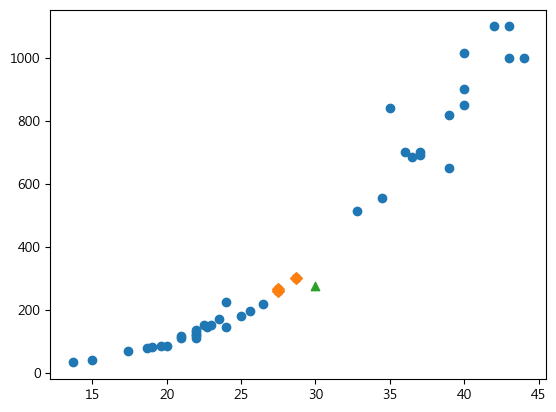

In [30]:
distances,indexes = knr.kneighbors([[30]])
indexes     # length 값 기준 최근접자 index 3개

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(30,275,marker='^')

In [31]:
distances,indexes = knr.kneighbors([[50]])
indexes     # length 값 기준 최근접자 index 3개
# 데이터 예측하기
# 길이가 50cm 농어예측
knr.predict([[50]])     # 1033.333 -> 1200 정도 나와야 정상

array([1033.33333333])

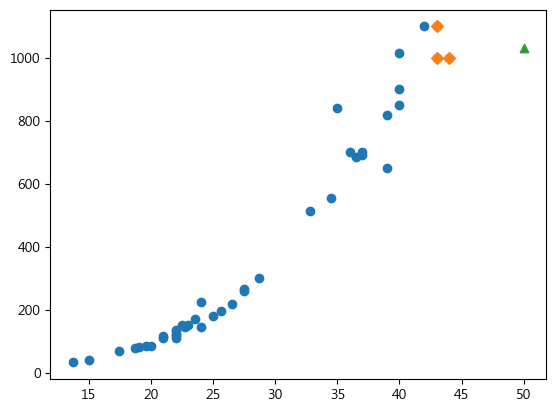

In [32]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50,1033,marker='^')

In [33]:
distances,indexes = knr.kneighbors([[70]])
indexes     # length 값 기준 최근접자 index 3개
knr.predict([[70]])

array([1033.33333333])

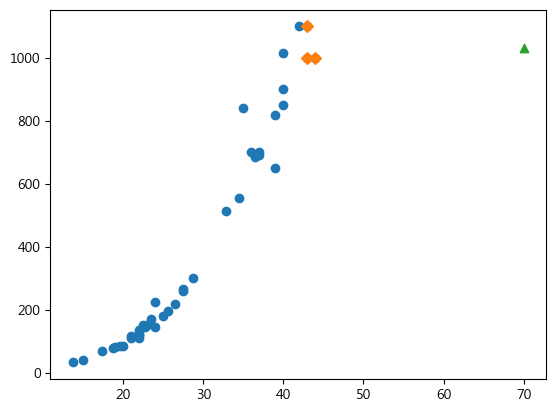

In [34]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(70,1033,marker='^')

In [23]:
knr.predict([[100]])    # 더이상 무게가 증가되지 않음, 왜그럴까
# 

array([1033.33333333])

선형회귀

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [37]:
predict = lr.predict(test_input)
print("예측 값 : ", predict)

예측 값 :  [-381.27462726   -6.71003561  363.95284155  122.04654277  168.86711673
  851.66715359  461.49570396  250.80312115  812.65000863  110.34139928
  988.22716096  -76.94089654  383.46141403  356.14941255]


In [44]:
# 선을 그리려면, 기울기과 y절편이 필요하다
# 기울기 : coef_, y절편 : intercept_
# _ : 모델을 훈련시켜서 모델에서 제공하는 변수의 형태에 붙는다
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535474


In [43]:
# 농어 50cm의 무게가 약 1500g이라는 실제 데이터가 있음
# 예측해보기

lr.predict([[50]])  # 1241g 이네!!

array([1241.83860323])

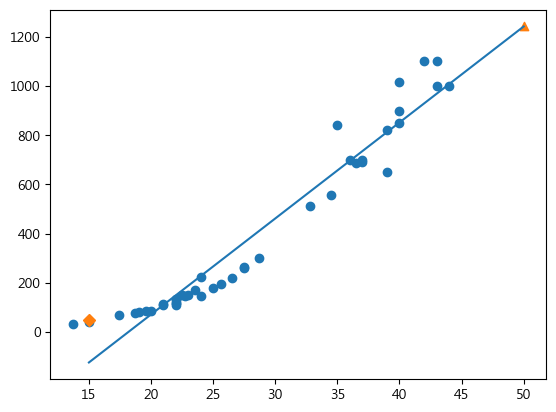

In [50]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_ , 50*lr.coef_+lr.intercept_])
plt.plot(15,50,marker='D')
plt.scatter(50,1241.8,marker='^')

length = 15cm인 농어의 무게가 (-)값을 가지는 선형회귀법 : 정확한 값을 예측하지 못한다.

선형 -> 곡선 회귀로 바꾸자

ax + b -> ax^2 + bx + c